<a href="https://colab.research.google.com/github/DrUkachi/EnergyMixForecasting/blob/main/azure_ml_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
# Import the required libraries
import pandas as pd
import numpy as np
import xlrd
import matplotlib.pyplot as plt
# Import a scoring metric to compare methods
from sklearn.metrics import r2_score
%matplotlib inline

In [48]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# !pip install openpyxl==3.0.7

     |████████████████████████████████| 245kB 4.0MB/s 
  Found existing installation: openpyxl 2.5.9
    Uninstalling openpyxl-2.5.9:
      Successfully uninstalled openpyxl-2.5.9


In [49]:
# energy_data = pd.read_excel("/content/drive/MyDrive/Timeseries/energy_data.xlsx")

energy_data = pd.read_excel("/content/drive/MyDrive/Timeseries/energy_data.xlsx")

In [50]:
energy_data

,Vector,2010,2015,2020,2025,2030,2035,2040,2045,2050
0,Nuclear fission,0.000000,0.000000,0.000000,21.428000,40.713200,79.283600,152.138800,293.563600,567.842000
1,Solar,0.027613,0.920430,48.334847,96.663559,154.129072,228.211414,285.161486,354.255098,435.670200
2,Wind,0.000000,0.000000,3.681720,7.363440,11.045160,14.726880,14.726880,18.408600,22.090320
3,Hydro,10.273752,10.273752,17.321616,28.620364,37.819529,46.966099,56.165265,65.311834,74.511000
4,Electricity oversupply (imports),0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,Waste,57.597242,121.120647,219.646734,309.826785,345.463046,408.526213,450.793320,493.999084,509.922993
6,Agriculture,1673.226110,1803.317783,1943.579765,2094.815441,2257.892888,2433.750254,2623.401628,2827.943416,3048.561297
7,Biomass oversupply (imports),0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,Coal reserves,6.172151,6.172151,7.172151,17.500000,34.000000,50.500000,67.000000,83.500000,100.000000
9,Coal oversupply (imports),0.000000,0.000000,12.802967,99.490482,242.634213,456.820818,684.751148,910.974411,1137.326775


In [51]:
use_data = energy_data.T

In [52]:
use_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
Vector,Nuclear fission,Solar,Wind,Hydro,Electricity oversupply (imports),Waste,Agriculture,Biomass oversupply (imports),Coal reserves,Coal oversupply (imports),Oil reserves,Oil and petroleum products oversupply (imports),Gas reserves,Gas oversupply (imports),Total produced or used in Nigeria
2010,0.0,0.027613,0.0,10.273752,0.0,57.597242,1673.22611,0.0,6.172151,0.0,1458.937864,0.0,761.432111,0.0,3967.666843
2015,0.0,0.92043,0.0,10.273752,0.0,121.120647,1803.317783,0.0,6.172151,0.0,1458.937864,0.0,844.920333,0.0,4245.66296
2020,0.0,48.334847,3.68172,17.321616,0.0,219.646734,1943.579765,0.0,7.172151,12.802967,1448.516879,0.0,860.646,0.0,4561.702679
2025,21.428,96.663559,7.36344,28.620364,0.0,309.826785,2094.815441,0.0,17.5,99.490482,1438.095894,0.0,876.371667,0.0,4990.175631
2030,40.7132,154.129072,11.04516,37.819529,0.0,345.463046,2257.892888,0.0,34.0,242.634213,1427.67491,0.0,892.097333,0.0,5443.469351
2035,79.2836,228.211414,14.72688,46.966099,0.0,408.526213,2433.750254,0.0,50.5,456.820818,1417.253925,0.0,907.823,0.0,6043.862204
2040,152.1388,285.161486,14.72688,56.165265,0.0,450.79332,2623.401628,0.0,67.0,684.751148,1406.83294,0.0,923.548667,0.0,6664.520133
2045,293.5636,354.255098,18.4086,65.311834,0.0,493.999084,2827.943416,0.0,83.5,910.974411,1396.411955,0.0,939.274333,0.0,7383.642331
2050,567.842,435.6702,22.09032,74.511,0.0,509.922993,3048.561297,0.0,100.0,1137.326775,1385.990971,0.0,955.0,0.0,8236.915556


In [53]:
use_data.columns

RangeIndex(start=0, stop=15, step=1)

In [54]:
use_data.columns = use_data.iloc[0]
use_data = use_data[1:]

In [55]:
use_data.index

Index([2010, 2015, 2020, 2025, 2030, 2035, 2040, 2045, 2050], dtype='object')

In [56]:
# Remove all imports
produced = [col for col in use_data.columns if "imports" not in col]
        

In [57]:
produced = ['Nuclear fission',
 'Solar',
 'Wind',
 'Hydro',
 'Waste',
 'Agriculture',
 'Coal reserves',
 'Oil reserves',
 'Gas reserves']

In [58]:
energy_produced = use_data[produced]

In [59]:
energy_produced.columns

Index(['Nuclear fission', 'Solar', 'Wind', 'Hydro', 'Waste', 'Agriculture',
       'Coal reserves', 'Oil reserves', 'Gas reserves'],
      dtype='object', name='Vector')

In [60]:
energy_produced

Vector,Nuclear fission,Solar,Wind,Hydro,Waste,Agriculture,Coal reserves,Oil reserves,Gas reserves
2010,0.0,0.027613,0.0,10.273752,57.597242,1673.22611,6.172151,1458.937864,761.432111
2015,0.0,0.92043,0.0,10.273752,121.120647,1803.317783,6.172151,1458.937864,844.920333
2020,0.0,48.334847,3.68172,17.321616,219.646734,1943.579765,7.172151,1448.516879,860.646
2025,21.428,96.663559,7.36344,28.620364,309.826785,2094.815441,17.5,1438.095894,876.371667
2030,40.7132,154.129072,11.04516,37.819529,345.463046,2257.892888,34.0,1427.67491,892.097333
2035,79.2836,228.211414,14.72688,46.966099,408.526213,2433.750254,50.5,1417.253925,907.823
2040,152.1388,285.161486,14.72688,56.165265,450.79332,2623.401628,67.0,1406.83294,923.548667
2045,293.5636,354.255098,18.4086,65.311834,493.999084,2827.943416,83.5,1396.411955,939.274333
2050,567.842,435.6702,22.09032,74.511,509.922993,3048.561297,100.0,1385.990971,955.0


In [61]:
energy_produced.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9 entries, 2010 to 2050
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Nuclear fission  9 non-null      object
 1   Solar            9 non-null      object
 2   Wind             9 non-null      object
 3   Hydro            9 non-null      object
 4   Waste            9 non-null      object
 5   Agriculture      9 non-null      object
 6   Coal reserves    9 non-null      object
 7   Oil reserves     9 non-null      object
 8   Gas reserves     9 non-null      object
dtypes: object(9)
memory usage: 720.0+ bytes


In [62]:
vector = [2011, 2012, 2013, 2014]
nuclear = [np.nan] * 4
solar = [np.nan] * 4
wind = [np.nan] * 4
hydro = [np.nan]* 4
waste = [np.nan]*4
agric = [np.nan]*4
coal = [np.nan]*4
oil_reserve = [np.nan]*4
gas_reserve = [np.nan]*4

In [63]:
missing = pd.DataFrame(list(zip(nuclear, solar, wind, hydro, waste, agric, coal, oil_reserve, gas_reserve)),
                      columns=['Nuclear fission',
 'Solar',
 'Wind',
 'Hydro',
 'Waste',
 'Agriculture',
 'Coal reserves',
 'Oil reserves',
 'Gas reserves',])

In [64]:
missing.reindex(vector)

,Nuclear fission,Solar,Wind,Hydro,Waste,Agriculture,Coal reserves,Oil reserves,Gas reserves
2011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
def create_missing(start, end):
    vector = list(range(start, end))
    length = len(vector)
    nuclear = [np.nan] * length
    solar = [np.nan] * length
    wind = [np.nan] * length
    hydro = [np.nan]* length
    waste = [np.nan]*length
    agric = [np.nan]*length
    coal = [np.nan]*length
    oil_reserve = [np.nan]*length
    gas_reserve = [np.nan]*length
    
    missing = pd.DataFrame(list(zip(nuclear, solar, wind, hydro, waste, agric, coal, oil_reserve, gas_reserve)),
                      columns=['Nuclear fission',
     'Solar',
     'Wind',
     'Hydro',
     'Waste',
     'Agriculture',
     'Coal reserves',
     'Oil reserves',
     'Gas reserves',])
    missing = missing.reindex(vector)
    missing.index.name = "Vector"
    return missing
    
    

In [66]:
count = 0
new_data_frame = pd.DataFrame()
dataframes = []
for index, nuclear, solar, wind, hydro, waste, agriculture, coal, oil, gas in energy_produced.itertuples():
    top = energy_produced[energy_produced.index==index]
    dataframes.append(top)
    missing = create_missing(index+1, index+5)
    dataframes.append(missing)

last_2055 = create_missing(2055, 2056)
dataframes.append(last_2055)
full_result = pd.concat(dataframes)

full_result
    
    

,Nuclear fission,Solar,Wind,Hydro,Waste,Agriculture,Coal reserves,Oil reserves,Gas reserves
2010,0.0,0.027613,0.0,10.273752,57.597242,1673.22611,6.172151,1458.937864,761.432111
2011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015,0.0,0.92043,0.0,10.273752,121.120647,1803.317783,6.172151,1458.937864,844.920333
2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
full_result.rename(columns = {'Nuclear fission': 'Nuclear_fission',
                              "Oil reserves":"Oil_reserves",
                                            'Coal reserves': 'Coal_reserves',
                                           "Gas reserves": "Gas_reserves"}, inplace=True)

In [68]:
full_result.columns

Index(['Nuclear_fission', 'Solar', 'Wind', 'Hydro', 'Waste', 'Agriculture',
       'Coal_reserves', 'Oil_reserves', 'Gas_reserves'],
      dtype='object')

In [69]:
full_result = full_result.assign(
    NuclearRollingMean=full_result.Nuclear_fission.fillna(
    full_result.Nuclear_fission.rolling(24,min_periods=1,).mean()))
full_result = full_result.assign(
    SolarRollingMean=full_result.Solar.fillna(full_result.Solar.rolling(
        24,min_periods=1,).mean()))
full_result = full_result.assign(
    WindRollingMean=full_result.Wind.fillna(
        full_result.Wind.rolling(24,min_periods=1,).mean()))
full_result = full_result.assign(
    HydroRollingMean=full_result.Hydro.fillna(
        full_result.Hydro.rolling(24,min_periods=1,).mean()))
full_result = full_result.assign(
    WasteRollingMean=full_result.Waste.fillna(
        full_result.Waste.rolling(24,min_periods=1,).mean()))
full_result = full_result.assign(
    AgricultureRollingMean=full_result.Agriculture.fillna(
        full_result.Agriculture.rolling(24,min_periods=1,).mean()))
full_result = full_result.assign(
    Coal_reservesRollingMean=full_result.Coal_reserves.fillna(
        full_result.Coal_reserves.rolling(24,min_periods=1,).mean()))
full_result = full_result.assign(
    Oil_reservesRollingMean=full_result.Oil_reserves.fillna(
        full_result.Oil_reserves.rolling(24,min_periods=1,).mean()))
full_result = full_result.assign(
    Gas_reservesrRollingMean=full_result.Gas_reserves.fillna(
        full_result.Gas_reserves.rolling(24,min_periods=1,).mean()))


In [71]:
full_result.columns

Index(['Nuclear_fission', 'Solar', 'Wind', 'Hydro', 'Waste', 'Agriculture',
       'Coal_reserves', 'Oil_reserves', 'Gas_reserves', 'NuclearRollingMean',
       'SolarRollingMean', 'WindRollingMean', 'HydroRollingMean',
       'WasteRollingMean', 'AgricultureRollingMean',
       'Coal_reservesRollingMean', 'Oil_reservesRollingMean',
       'Gas_reservesrRollingMean'],
      dtype='object')

Plotting the imputed data we have


### Performing actual forecast

Importing all the necessary modules

In [ ]:
import warnings

import matplotlib as mpl
import numpy as np
import pandas as pd  # Basic library for all of our dataset operations
import statsmodels as sm
import tensorflow as tf
from matplotlib import pyplot as plt
from pylab import rcParams
from sklearn.linear_model import LinearRegression
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa import api as smt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller


# We will use deprecated models of statmodels which throw a lot of warnings to use more modern ones
warnings.filterwarnings("ignore")

# Extra settings
seed = 42
tf.random.set_seed(seed)
np.random.seed(seed)
plt.style.use('bmh')
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['text.color'] = 'k'
print(tf.__version__)

2.4.0


In [ ]:
# Converting the column to DateTime format
df_date = full_result.copy()
df_date.index = pd.to_datetime(full_result.index, format='%Y')

In [ ]:
df_date = full_result.copy()

df_date.index = pd.to_datetime(full_result.index, format='%Y')

In [ ]:
df_date

,Nuclear_fission,Solar,Wind,Hydro,Waste,Agriculture,Coal_reserves,Oil_reserves,Gas_reserves,NuclearRollingMean,SolarRollingMean,WindRollingMean,HydroRollingMean,WasteRollingMean,AgricultureRollingMean,Coal_reservesRollingMean,Oil_reservesRollingMean,Gas_reservesrRollingMean
2010-01-01,0.0,0.027613,0.0,10.273752,57.597242,1673.22611,6.172151,1458.937864,761.432111,0.00000,0.027613,0.000000,10.273752,57.597242,1673.226110,6.172151,1458.937864,761.432111
2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00000,0.027613,0.000000,10.273752,57.597242,1673.226110,6.172151,1458.937864,761.432111
2012-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00000,0.027613,0.000000,10.273752,57.597242,1673.226110,6.172151,1458.937864,761.432111
2013-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00000,0.027613,0.000000,10.273752,57.597242,1673.226110,6.172151,1458.937864,761.432111
2014-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00000,0.027613,0.000000,10.273752,57.597242,1673.226110,6.172151,1458.937864,761.432111
2015-01-01,0.0,0.92043,0.0,10.273752,121.120647,1803.317783,6.172151,1458.937864,844.920333,0.00000,0.920430,0.000000,10.273752,121.120647,1803.317783,6.172151,1458.937864,844.920333
2016-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00000,0.474021,0.000000,10.273752,89.358944,1738.271947,6.172151,1458.937864,803.176222
2017-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00000,0.474021,0.000000,10.273752,89.358944,1738.271947,6.172151,1458.937864,803.176222
2018-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00000,0.474021,0.000000,10.273752,89.358944,1738.271947,6.172151,1458.937864,803.176222
2019-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00000,0.474021,0.000000,10.273752,89.358944,1738.271947,6.172151,1458.937864,803.176222


## Time Series Analysis

### Decomposing our Time Series


One of the most common analysis for time series is decomposing it into multiple parts. The parts we can divide a time series into are: level, trend, seasonality and noise, all series contain level and noise but seasonality and trend are not always present (there will be more analysis for this two parts).

This 4 parts can combine either additively or multiplicatively into the time series.

##### Additive Model
`y(t) = Level + Trend + Seasonality + Noise`

Additives models are lineal. Trend is linear and seasonality has constant frequency and amplitude. Change is constant over time

##### Multiplicative model
`y(t) = Level * Trend * Seasonality * Noise`

Multiplicatives models are nonlinear,trend is curved and seasonality is not constant. Change is not constant over time

Decomposing is used to analyse the time series. Identify each one of the different parts of the time series and its behaviour, each of the components may affect your models in different ways.

Most time series are a combination of a additive model and a multiplicate model, is hard to identify real world time series into one single model.

##### Automatic time series decomposition

Statsmodel python library provides a function [seasonal_compose()](http://www.statsmodels.org/dev/generated/statsmodels.tsa.seasonal.seasonal_decompose.html) to automatically decompose a time series, you still need to specify wether the model is additive or multiplicative. We will use multiplicative as our quick peak at the pm2.5 time series shows no linear trend.

In [ ]:
rcParams['figure.figsize'] = 18, 8
plt.figure(num=None, figsize=(50, 20), dpi=80, facecolor='w', edgecolor='k')
series = df_date["RollingMean"]
result = seasonal_decompose(series, model='multiplicative')
result.plot();

### Level

Level simply means the current value of the series once we remove trend, seasonality and the random noise. These are the true values that come from the series itself and we will try to predict with our models. Most of the models will benefit the more our time series is composed by the level and not trends/seasonality/noise. We also present models capable of handling seasonality and trend (non stationary series)

### TREND
A trend is observed when there is an increasing or decreasing slope observed in the time series. A trend is a smooth, general, long-term, average tendency. It is not always necessary that the increase or decrease is in the same direction throughout the given period of time.

Trend can be removed from your time series data (and data in the future) as a data preparation and cleaning exercise. This is common when using statistical methods for time series forecasting, but does not always improve results when using machine learning models. We will see different methods for this in the making your series stationary section

In practice, identifying a trend in a time series can be a subjective process as we are never sure if contains seasonalities or noise to it,
Create line plots of your data and inspect the plots for obvious trends.

Now we will try some methods to check for trend in our series:
* Automatic decomposing
* Moving average
* Fit a linear regression model to identify trend



### Seasonality
Seasonality is observed when there is a distinct repeated pattern observed between regular intervals due to seasonal factors. It could be because of the month of the year, the day of the month, weekdays or even time of the day. For example the amount of sunscream protector (always low in winter and high in summer).

The automatic decomposing chart did not gave us a good look into the decomposed seasonality, let's try decomposing smaller parts of the time series first and test seasonalities we found into the others.

Lets go with the first year of data only now:

In [ ]:
rcParams['figure.figsize'] = 18, 8
plt.figure(num=None, figsize=(50, 20), dpi=80, facecolor='w', edgecolor='k')
series = df_date["RollingMean"]
result = seasonal_decompose(series, model='multiplicative')
result.plot();

## Performing the Time Series Forecast

In [ ]:
# !pip install -r "/content/drive/MyDrive/Timeseries/time-series-forecasting-with-python/requirements.txt"

In [ ]:
# !pip install pmdarima


In [ ]:
import pickle
import warnings
from math import sqrt

import lightgbm as lgb
import matplotlib as mpl
import numpy as np
import pandas as pd  # Basic library for all of our dataset operations
import pmdarima as pm
import tensorflow as tf
import xgboost as xgb
from bayes_opt import BayesianOptimization
from fbprophet import Prophet
from gluonts.dataset.common import ListDataset
from gluonts.evaluation.backtest import make_evaluation_predictions
from gluonts.model.deepar import DeepAREstimator
from gluonts.mx.trainer import Trainer
from matplotlib import pyplot as plt
from sklearn import linear_model, svm
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARIMA, ARMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing, SimpleExpSmoothing
from statsmodels.tsa.statespace.sarimax import SARIMAX
from tqdm import tqdm

# from utils.metrics import evaluate


# We will use deprecated models of statmodels which throw a lot of warnings to use more modern ones
warnings.filterwarnings("ignore")


# Extra settings
seed = 42
tf.random.set_seed(seed)
np.random.seed(seed)
plt.style.use('bmh')
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['text.color'] = 'k'
mpl.rcParams['figure.figsize'] = 18, 8

print(tf.__version__)

# air_pollution = pd.read_csv('datasets/air_pollution.csv', parse_dates=['date'])
# air_pollution.set_index('date', inplace=True)

2.4.0


In [72]:
import numpy as np
from sklearn.metrics import r2_score

EPSILON = 1e-10


def _error(actual: np.ndarray, predicted: np.ndarray):
    """Simple error"""
    return actual - predicted


def _percentage_error(actual: np.ndarray, predicted: np.ndarray):
    """
    Percentage error

    Note: result is NOT multiplied by 100
    """
    return _error(actual, predicted) / (actual + EPSILON)


def _naive_forecasting(actual: np.ndarray, seasonality: int = 1):
    """Naive forecasting method which just repeats previous samples"""
    return actual[:-seasonality]


def _relative_error(
    actual: np.ndarray, predicted: np.ndarray, benchmark: np.ndarray = None
):
    """Relative Error"""
    if benchmark is None or isinstance(benchmark, int):
        # If no benchmark prediction provided - use naive forecasting
        if not isinstance(benchmark, int):
            seasonality = 1
        else:
            seasonality = benchmark
        return _error(actual[seasonality:], predicted[seasonality:]) / (
            _error(actual[seasonality:], _naive_forecasting(actual, seasonality))
            + EPSILON
        )

    return _error(actual, predicted) / (_error(actual, benchmark) + EPSILON)


def _bounded_relative_error(
    actual: np.ndarray, predicted: np.ndarray, benchmark: np.ndarray = None
):
    """Bounded Relative Error"""
    if benchmark is None or isinstance(benchmark, int):
        # If no benchmark prediction provided - use naive forecasting
        if not isinstance(benchmark, int):
            seasonality = 1
        else:
            seasonality = benchmark

        abs_err = np.abs(_error(actual[seasonality:], predicted[seasonality:]))
        abs_err_bench = np.abs(
            _error(actual[seasonality:], _naive_forecasting(actual, seasonality))
        )
    else:
        abs_err = np.abs(_error(actual, predicted))
        abs_err_bench = np.abs(_error(actual, benchmark))

    return abs_err / (abs_err + abs_err_bench + EPSILON)


def _geometric_mean(a, axis=0, dtype=None):
    """Geometric mean"""
    if not isinstance(a, np.ndarray):  # if not an ndarray object attempt to convert it
        log_a = np.log(np.array(a, dtype=dtype))
    elif dtype:  # Must change the default dtype allowing array type
        if isinstance(a, np.ma.MaskedArray):
            log_a = np.log(np.ma.asarray(a, dtype=dtype))
        else:
            log_a = np.log(np.asarray(a, dtype=dtype))
    else:
        log_a = np.log(a)
    return np.exp(log_a.mean(axis=axis))


def mse(actual: np.ndarray, predicted: np.ndarray):
    """Mean Squared Error"""
    return np.mean(np.square(_error(actual, predicted)))


def rmse(actual: np.ndarray, predicted: np.ndarray):
    """Root Mean Squared Error"""
    return np.sqrt(mse(actual, predicted))


def nrmse(actual: np.ndarray, predicted: np.ndarray):
    """Normalized Root Mean Squared Error"""
    return rmse(actual, predicted) / (actual.max() - actual.min())


def me(actual: np.ndarray, predicted: np.ndarray):
    """Mean Error"""
    return np.mean(_error(actual, predicted))


def mae(actual: np.ndarray, predicted: np.ndarray):
    """Mean Absolute Error"""
    return np.mean(np.abs(_error(actual, predicted)))


mad = mae  # Mean Absolute Deviation (it is the same as MAE)


def gmae(actual: np.ndarray, predicted: np.ndarray):
    """Geometric Mean Absolute Error"""
    return _geometric_mean(np.abs(_error(actual, predicted)))


def mdae(actual: np.ndarray, predicted: np.ndarray):
    """Median Absolute Error"""
    return np.median(np.abs(_error(actual, predicted)))


def mpe(actual: np.ndarray, predicted: np.ndarray):
    """Mean Percentage Error"""
    return np.mean(_percentage_error(actual, predicted))


def mape(actual: np.ndarray, predicted: np.ndarray):
    """
    Mean Absolute Percentage Error

    Properties:
        + Easy to interpret
        + Scale independent
        - Biased, not symmetric
        - Undefined when actual[t] == 0

    Note: result is NOT multiplied by 100
    """
    return np.mean(np.abs(_percentage_error(actual, predicted)))


def mdape(actual: np.ndarray, predicted: np.ndarray):
    """
    Median Absolute Percentage Error

    Note: result is NOT multiplied by 100
    """
    return np.median(np.abs(_percentage_error(actual, predicted)))


def smape(actual: np.ndarray, predicted: np.ndarray):
    """
    Symmetric Mean Absolute Percentage Error

    Note: result is NOT multiplied by 100
    """
    return np.mean(
        2.0
        * np.abs(actual - predicted)
        / ((np.abs(actual) + np.abs(predicted)) + EPSILON)
    )


def smdape(actual: np.ndarray, predicted: np.ndarray):
    """
    Symmetric Median Absolute Percentage Error

    Note: result is NOT multiplied by 100
    """
    return np.median(
        2.0
        * np.abs(actual - predicted)
        / ((np.abs(actual) + np.abs(predicted)) + EPSILON)
    )


def maape(actual: np.ndarray, predicted: np.ndarray):
    """
    Mean Arctangent Absolute Percentage Error

    Note: result is NOT multiplied by 100
    """
    return np.mean(np.arctan(np.abs((actual - predicted) / (actual + EPSILON))))


def mase(actual: np.ndarray, predicted: np.ndarray, seasonality: int = 1):
    """
    Mean Absolute Scaled Error

    Baseline (benchmark) is computed with naive forecasting (shifted by @seasonality)
    """
    return mae(actual, predicted) / mae(
        actual[seasonality:], _naive_forecasting(actual, seasonality)
    )


def std_ae(actual: np.ndarray, predicted: np.ndarray):
    """Normalized Absolute Error"""
    __mae = mae(actual, predicted)
    return np.sqrt(
        np.sum(np.square(_error(actual, predicted) - __mae)) / (len(actual) - 1)
    )


def std_ape(actual: np.ndarray, predicted: np.ndarray):
    """Normalized Absolute Percentage Error"""
    __mape = mape(actual, predicted)
    return np.sqrt(
        np.sum(np.square(_percentage_error(actual, predicted) - __mape))
        / (len(actual) - 1)
    )


def rmspe(actual: np.ndarray, predicted: np.ndarray):
    """
    Root Mean Squared Percentage Error

    Note: result is NOT multiplied by 100
    """
    return np.sqrt(np.mean(np.square(_percentage_error(actual, predicted))))


def rmdspe(actual: np.ndarray, predicted: np.ndarray):
    """
    Root Median Squared Percentage Error

    Note: result is NOT multiplied by 100
    """
    return np.sqrt(np.median(np.square(_percentage_error(actual, predicted))))


def rmsse(actual: np.ndarray, predicted: np.ndarray, seasonality: int = 1):
    """Root Mean Squared Scaled Error"""
    q = np.abs(_error(actual, predicted)) / mae(
        actual[seasonality:], _naive_forecasting(actual, seasonality)
    )
    return np.sqrt(np.mean(np.square(q)))


def inrse(actual: np.ndarray, predicted: np.ndarray):
    """Integral Normalized Root Squared Error"""
    return np.sqrt(
        np.sum(np.square(_error(actual, predicted)))
        / np.sum(np.square(actual - np.mean(actual)))
    )


def rrse(actual: np.ndarray, predicted: np.ndarray):
    """Root Relative Squared Error"""
    return np.sqrt(
        np.sum(np.square(actual - predicted))
        / np.sum(np.square(actual - np.mean(actual)))
    )


def mre(actual: np.ndarray, predicted: np.ndarray, benchmark: np.ndarray = None):
    """Mean Relative Error"""
    return np.mean(_relative_error(actual, predicted, benchmark))


def rae(actual: np.ndarray, predicted: np.ndarray):
    """Relative Absolute Error (aka Approximation Error)"""
    return np.sum(np.abs(actual - predicted)) / (
        np.sum(np.abs(actual - np.mean(actual))) + EPSILON
    )


def mrae(actual: np.ndarray, predicted: np.ndarray, benchmark: np.ndarray = None):
    """Mean Relative Absolute Error"""
    return np.mean(np.abs(_relative_error(actual, predicted, benchmark)))


def mdrae(actual: np.ndarray, predicted: np.ndarray, benchmark: np.ndarray = None):
    """Median Relative Absolute Error"""
    return np.median(np.abs(_relative_error(actual, predicted, benchmark)))


def gmrae(actual: np.ndarray, predicted: np.ndarray, benchmark: np.ndarray = None):
    """Geometric Mean Relative Absolute Error"""
    return _geometric_mean(np.abs(_relative_error(actual, predicted, benchmark)))


def mbrae(actual: np.ndarray, predicted: np.ndarray, benchmark: np.ndarray = None):
    """Mean Bounded Relative Absolute Error"""
    return np.mean(_bounded_relative_error(actual, predicted, benchmark))


def umbrae(actual: np.ndarray, predicted: np.ndarray, benchmark: np.ndarray = None):
    """Unscaled Mean Bounded Relative Absolute Error"""
    __mbrae = mbrae(actual, predicted, benchmark)
    return __mbrae / (1 - __mbrae)


def mda(actual: np.ndarray, predicted: np.ndarray):
    """Mean Directional Accuracy"""
    return np.mean(
        (
            np.sign(actual[1:] - actual[:-1]) == np.sign(predicted[1:] - predicted[:-1])
        ).astype(int)
    )


def bias(actual: np.ndarray, predicted: np.ndarray):
    """Mean forecast error(or Forecast Bias)"""
    return np.mean(actual - predicted)


METRICS = {
    "mse": mse,
    "rmse": rmse,
    "nrmse": nrmse,
    "me": me,
    "mae": mae,
    "mad": mad,
    "gmae": gmae,
    "mdae": mdae,
    "mpe": mpe,
    "mape": mape,
    "mdape": mdape,
    "smape": smape,
    "smdape": smdape,
    "maape": maape,
    "mase": mase,
    "std_ae": std_ae,
    "std_ape": std_ape,
    "rmspe": rmspe,
    "rmdspe": rmdspe,
    "rmsse": rmsse,
    "inrse": inrse,
    "rrse": rrse,
    "mre": mre,
    "rae": rae,
    "mrae": mrae,
    "mdrae": mdrae,
    "gmrae": gmrae,
    "mbrae": mbrae,
    "umbrae": umbrae,
    "mda": mda,
    "bias": bias,
    "r2": r2_score,
}


def evaluate(
    actual: np.ndarray, predicted: np.ndarray, metrics=("mae", "rmse", "mape", "r2")
):
    results = {}
    for name in metrics:
        try:
            results[name] = METRICS[name](actual, predicted)
        except Exception as err:
            results[name] = np.nan
            print("Unable to compute metric {0}: {1}".format(name, err))
    return results


def evaluate_all(actual: np.ndarray, predicted: np.ndarray):
    return evaluate(actual, predicted, metrics=set(METRICS.keys()))


In [73]:
import matplotlib.pyplot as plt
import pandas as pd


def bar_metrics(resultsDict):
    df = pd.DataFrame.from_dict(resultsDict)
    colors = plt.rcParams["axes.prop_cycle"].by_key()["color"]
    pallette = plt.cm.get_cmap("tab20c", len(df.columns))
    colors = [pallette(x) for x in range(len(df.columns))]
    color_dict = dict(zip(df.columns, colors))
    fig = plt.figure(figsize=(20, 15))

    # MAE plot
    fig.add_subplot(2, 2, 1)
    df.loc["mae"].sort_values().plot(
        kind="bar",
        colormap="Paired",
        color=[color_dict.get(x, "#333333") for x in df.loc["mae"].sort_values().index],
    )
    plt.legend()
    plt.title("MAE Metric, lower is better")
    fig.add_subplot(2, 2, 2)
    df.loc["rmse"].sort_values().plot(
        kind="bar",
        colormap="Paired",
        color=[
            color_dict.get(x, "#333333") for x in df.loc["rmse"].sort_values().index
        ],
    )
    plt.legend()
    plt.title("RMSE Metric, lower is better")
    fig.add_subplot(2, 2, 3)
    df.loc["mape"].sort_values().plot(
        kind="bar",
        colormap="Paired",
        color=[
            color_dict.get(x, "#333333") for x in df.loc["mape"].sort_values().index
        ],
    )
    plt.legend()
    plt.title("MAPE Metric, lower is better")
    fig.add_subplot(2, 2, 4)
    df.loc["r2"].sort_values(ascending=False).plot(
        kind="bar",
        colormap="Paired",
        color=[
            color_dict.get(x, "#333333")
            for x in df.loc["r2"].sort_values(ascending=False).index
        ],
    )
    plt.legend()
    plt.title("R2 Metric, higher is better")
    plt.tight_layout()
    plt.savefig("results/metrics.png")
    plt.show()


In [74]:
resultsDict = {}
predictionsDict = {}

split_date = '2040-01-01'
df_training = df_date.loc[df_date.index <= split_date]
df_test = df_date.loc[df_date.index > split_date]
print(f"{len(df_training)} years of training data \n {len(df_test)} years of testing data ")

df_training.to_csv('/content/drive/MyDrive/Timeseries/training.csv')
df_test.to_csv('/content/drive/MyDrive/Timeseries/test.csv')


31 years of training data 
 15 years of testing data 


## Univariate-time-series-forecasting

In this section we will focus on time series forecasting methods capable of only looking at the target variable. This means no other regressors (more variables) can be added into the model.

It is also very important to include some naive forecast as the series mean or previous value to make sure our models perform better than the simplest of the simplest. We dont want to introduce any complexity if it does not provides any performance gain.

### Simple Exponential Smoothing (SES)

The Simple Exponential Smoothing (SES) method models the next time step as an exponentially weighted linear function of observations at prior time steps. This method expects our time series to be non stationary in order to perform adecuately (no trend or seasonality)

In [ ]:
# Walk through the test data, training and predicting 1 day ahead for all the test data
index = len(df_training)
yhat = list()
for t in tqdm(range(len(df_test.RollingMean))):
    temp_train = df_date[:len(df_training)+t]
    model = SimpleExpSmoothing(temp_train.RollingMean)
    model_fit = model.fit()
    predictions = model_fit.predict(start=len(temp_train), end=len(temp_train))
    yhat = yhat + [predictions]

yhat = pd.concat(yhat)
resultsDict['SES'] = evaluate(df_test.RollingMean, yhat.values)
predictionsDict['SES'] = yhat.values

### Holt Winter’s Exponential Smoothing (HWES)

HWES or also known as triple exponential smoothing

In [ ]:
# Walk through the test data, training and predicting 1 day ahead for all the test data
index = len(df_training)
yhat = list()
for t in tqdm(range(len(df_test.RollingMean))):
    temp_train = df_date[:len(df_training)+t]
    model = ExponentialSmoothing(temp_train.RollingMean)
    model_fit = model.fit()
    predictions = model_fit.predict(start=len(temp_train), end=len(temp_train))
    yhat = yhat + [predictions]

yhat = pd.concat(yhat)
resultsDict['HWES'] = evaluate(df_test.RollingMean, yhat.values)
predictionsDict['HWES'] = yhat.values

### Autoregression (AR)
The autoregression (AR) method models the next step in the sequence as a linear function of the observations at prior time steps. Parameters of the model:

- __Number of AR (Auto-Regressive) terms (p):__ p is the parameter associated with the auto-regressive aspect of the model, which incorporates past values i.e lags of dependent variable. For instance if p is 5, the predictors for x(t) will be x(t-1)….x(t-5).


In [93]:
# Walk through the test data, training and predicting 1 day ahead for all the test data
index = len(df_training)
yhat = list()
for t in tqdm(range(len(df_test.SolarRollingMean))):
    temp_train = df_date[:len(df_training)+t]
    model = AR(temp_train.SolarRollingMean)
    model_fit = model.fit()
    predictions = model_fit.predict(start=len(temp_train), 
                                    end=len(temp_train),
                                    dynamic=False)
    yhat = yhat + [predictions]

yhat = pd.concat(yhat)
resultsDict['AR'] = evaluate(df_test.SolarRollingMean, yhat.values)
predictionsDict['AR'] = yhat.values

100%|██████████| 15/15 [00:00<00:00, 139.84it/s]


In [166]:
def auto_regression(column_name):
  # Walk through the test data, training and predicting 1 day ahead for all the test data
  index = len(df_training)
  yhat = list()
  for t in tqdm(range(len(df_test[column_name]))):
      temp_train = df_date[:len(df_training)+t]
      model = AR(temp_train[column_name])
      model_fit = model.fit()
      predictions = model_fit.predict(start=len(temp_train), 
                                      end=len(temp_train),
                                      dynamic=False)
      yhat = yhat + [predictions]

  yhat = pd.concat(yhat)
  resultsDict['AR'] = evaluate(df_test[column_name], yhat.values)
  predictionsDict['AR'] = yhat.values
  yhat.to_excel(f"/content/drive/MyDrive/Timeseries/predicted_data_values/{column_name}.xlsx")
  return yhat

In [168]:
df_test.columns

Index(['Nuclear_fission', 'Solar', 'Wind', 'Hydro', 'Waste', 'Agriculture',
       'Coal_reserves', 'Oil_reserves', 'Gas_reserves', 'NuclearRollingMean',
       'SolarRollingMean', 'WindRollingMean', 'HydroRollingMean',
       'WasteRollingMean', 'AgricultureRollingMean',
       'Coal_reservesRollingMean', 'Oil_reservesRollingMean',
       'Gas_reservesrRollingMean'],
      dtype='object')

In [180]:
yhat = auto_regression("Gas_reservesrRollingMean")

100%|██████████| 15/15 [00:00<00:00, 158.12it/s]


In [186]:
def plot_ar_values(column_name, yhat, title):
  predicted_dates = list(range(2040, 2056,2))
  fig, ax = plt.subplots()
  plt.plot(df_test[column_name].values, label='Original')
  plt.plot(yhat.values, color='red', label='AR predicted')
  plt.title(f'Autoregression Forecast For {title} Energy')
  plt.ylabel("Energy in GW")
  plt.xlabel("Year")
  ax.set_xticklabels(predicted_dates, rotation=90)
  plt.legend();
  plt.savefig(f"/content/drive/MyDrive/Timeseries/images/{title}_auto_regression")

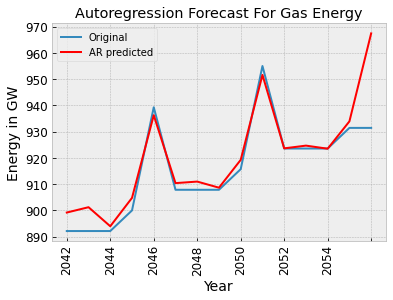

In [187]:
plot_ar_values("Gas_reservesrRollingMean", yhat, "Gas")

### Moving Average (MA)

The Moving Average (MA) method models the next step in the sequence as the average of a window of observations at prior time steps. Parameters of the model:


- __Number of MA (Moving Average) terms (q):__ q is size of the moving average part window of the model i.e. lagged forecast errors in prediction equation. For instance if q is 5, the predictors for x(t) will be e(t-1)….e(t-5) where e(i) is the difference between the moving average at ith instant and actual value.

In [75]:
# Walk through the test data, training and predicting 1 day ahead for all the test data
index = len(df_training)
yhat = list()
for t in tqdm(range(len(df_test.RollingMean))):
    temp_train = df_date[:len(df_training)+t]
    model = ARMA(temp_train.RollingMean, order=(0,1))
    model_fit = model.fit(disp=False)
    predictions = model_fit.predict(start=len(temp_train), 
                                    end=len(temp_train),
                                    dynamic=False)
    yhat = yhat + [predictions]

yhat = pd.concat(yhat)
resultsDict['MA'] = evaluate(df_test.RollingMean, yhat.values)
predictionsDict['MA'] = yhat.values

AttributeError: ignored

In [189]:
def moving_average(column_name):
  # Walk through the test data, training and predicting 1 day ahead for all the test data
  index = len(df_training)
  yhat = list()
  for t in tqdm(range(len(df_test[column_name]))):
      temp_train = df_date[:len(df_training)+t]
      model = ARMA(temp_train[column_name], order=(0,1))
      model_fit = model.fit()
      predictions = model_fit.predict(start=len(temp_train), 
                                      end=len(temp_train),
                                      dynamic=False)
      yhat = yhat + [predictions]

  yhat = pd.concat(yhat)
  resultsDict['AR'] = evaluate(df_test[column_name], yhat.values)
  predictionsDict['AR'] = yhat.values
  yhat.to_excel(f"/content/drive/MyDrive/Timeseries/predicted_data_values/moving_average_{column_name}.xlsx")
  return yhat

In [188]:
df_test.columns

Index(['Nuclear_fission', 'Solar', 'Wind', 'Hydro', 'Waste', 'Agriculture',
       'Coal_reserves', 'Oil_reserves', 'Gas_reserves', 'NuclearRollingMean',
       'SolarRollingMean', 'WindRollingMean', 'HydroRollingMean',
       'WasteRollingMean', 'AgricultureRollingMean',
       'Coal_reservesRollingMean', 'Oil_reservesRollingMean',
       'Gas_reservesrRollingMean'],
      dtype='object')

In [215]:
yhat = moving_average("Gas_reservesrRollingMean")

100%|██████████| 15/15 [00:00<00:00, 21.64it/s]


In [208]:
def plot_ma_values(column_name, yhat, title):
  predicted_dates = list(range(2040, 2056,2))
  fig, ax = plt.subplots()
  plt.plot(df_test[column_name].values, label='Original')
  plt.plot(yhat.values, color='red', label='MA predicted')
  plt.title(f'Moving Average Forecast For {title} Energy')
  plt.ylabel("Energy in GW")
  plt.xlabel("Year")
  ax.set_xticklabels(predicted_dates, rotation=90)
  plt.legend();
  plt.savefig(f"/content/drive/MyDrive/Timeseries/images/{title}_moving_average")

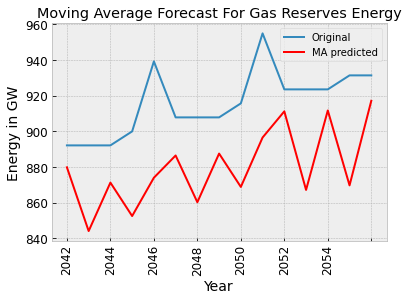

In [216]:
plot_ma_values("Gas_reservesrRollingMean", yhat, "Gas Reserves")

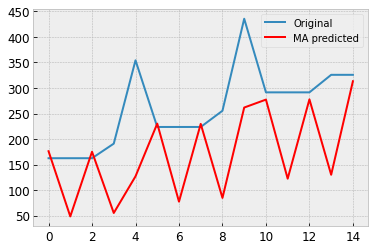

In [134]:
plt.plot(df_test.SolarRollingMean.values, label='Original')
plt.plot(yhat.values, color='red', label='MA predicted')
plt.legend()

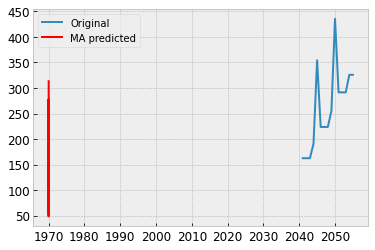

In [135]:
def plot_predictions(data_column, predicted_values):
  plt.plot(df_test[data_column], label="Original")
  plt.plot(predicted_values, color="red", label="MA predicted")
  plt.legend()

plot_predictions("SolarRollingMean", yhat.values)



### Autoregressive Moving Average (ARMA)

This method will basically join the previous two `AR` and `MA`. Model parameters will be the sum of the two.

- __Number of AR (Auto-Regressive) terms (p):__ p is the parameter associated with the auto-regressive aspect of the model, which incorporates past values i.e lags of dependent variable. For instance if p is 5, the predictors for x(t) will be x(t-1)….x(t-5).
- __Number of MA (Moving Average) terms (q):__ q is size of the moving average part window of the model i.e. lagged forecast errors in prediction equation. For instance if q is 5, the predictors for x(t) will be e(t-1)….e(t-5) where e(i) is the difference between the moving average at ith instant and actual value.



In [ ]:
# Walk through the test data, training and predicting 1 day ahead for all the test data
index = len(df_training)
yhat = list()
for t in tqdm(range(len(df_test.RollingMean))):
    temp_train = df_date[:len(df_training)+t]
    model = ARMA(temp_train.RollingMean, order=(1,1))
    model_fit = model.fit(disp=False)
    predictions = model_fit.predict(start=len(temp_train), 
                                    end=len(temp_train),
                                    dynamic=False)
    yhat = yhat + [predictions]

yhat = pd.concat(yhat)
resultsDict['ARMA'] = evaluate(df_test.RollingMean, yhat.values)
predictionsDict['ARMA'] = yhat.values

In [221]:
def autoregressive_moving_average(column_name):
  # Walk through the test data, training and predicting 1 day ahead for all the test data
  index = len(df_training)
  yhat = list()
  for t in tqdm(range(len(df_test[column_name]))):
      temp_train = df_date[:len(df_training)+t]
      model = ARMA(temp_train[column_name], order=(1,1))
      model_fit = model.fit()
      predictions = model_fit.predict(start=len(temp_train), 
                                      end=len(temp_train),
                                      dynamic=False)
      yhat = yhat + [predictions]

  yhat = pd.concat(yhat)
  resultsDict['ARMA'] = evaluate(df_test[column_name], yhat.values)
  predictionsDict['ARMA'] = yhat.values
  yhat.to_excel(f"/content/drive/MyDrive/Timeseries/predicted_data_values/autoregressive_moving_average{column_name}.xlsx")
  return yhat

In [222]:
df_test.columns

Index(['Nuclear_fission', 'Solar', 'Wind', 'Hydro', 'Waste', 'Agriculture',
       'Coal_reserves', 'Oil_reserves', 'Gas_reserves', 'NuclearRollingMean',
       'SolarRollingMean', 'WindRollingMean', 'HydroRollingMean',
       'WasteRollingMean', 'AgricultureRollingMean',
       'Coal_reservesRollingMean', 'Oil_reservesRollingMean',
       'Gas_reservesrRollingMean'],
      dtype='object')

In [220]:
yhat = autoregressive_moving_average("NuclearRollingMean")

 60%|██████    | 9/15 [00:01<00:01,  4.67it/s]


ValueError: ignored

In [ ]:
plt.plot(df_test.RollingMean.values, label='Original')
plt.plot(yhat.values, color='red', label='ARMA predicted')
plt.legend()

In [ ]:
def plot_arma_values(column_name, yhat, title):
  predicted_dates = list(range(2040, 2056,2))
  fig, ax = plt.subplots()
  plt.plot(df_test[column_name].values, label='Original')
  plt.plot(yhat.values, color='red', label='ARMA predicted')
  plt.title(f'Auto-Regressive Moving Average Forecast For {title} Energy')
  plt.ylabel("Energy in GW")
  plt.xlabel("Year")
  ax.set_xticklabels(predicted_dates, rotation=90)
  plt.legend();
  plt.savefig(f"/content/drive/MyDrive/Timeseries/images/{title}_auto-regressive_moving_average")

In [ ]:
plot_arma_values("Nuclear_fission", yhat, "Nuclear")

### Autoregressive integrated moving average (ARIMA)

In an ARIMA model there are 3 parameters that are used to help model the major aspects of a times series: seasonality, trend, and noise. These parameters are labeled p,d,and q.

* Number of AR (Auto-Regressive) terms (p): p is the parameter associated with the auto-regressive aspect of the model, which incorporates past values i.e lags of dependent variable. For instance if p is 5, the predictors for x(t) will be x(t-1)….x(t-5).
* Number of Differences (d): d is the parameter associated with the integrated part of the model, which effects the amount of differencing to apply to a time series.
* Number of MA (Moving Average) terms (q): q is size of the moving average part window of the model i.e. lagged forecast errors in prediction equation. For instance if q is 5, the predictors for x(t) will be e(t-1)….e(t-5) where e(i) is the difference between the moving average at ith instant and actual value.

**Tuning ARIMA parameters**

Non stationarity series will require level of differencing (d) >0 in ARIMA
Select the lag values for the Autoregression (AR) and Moving Average (MA) parameters, p and q respectively, using PACF, ACF plots
AUTOARIMA

Note: A problem with ARIMA is that it does not support seasonal data. That is a time series with a repeating cycle. ARIMA expects data that is either not seasonal or has the seasonal component removed, e.g. seasonally adjusted via methods such as seasonal differencing.

In [ ]:
# Walk through the test data, training and predicting 1 day ahead for all the test data
index = len(df_training)
yhat = list()
for t in tqdm(range(len(df_test.RollingMean))):
    temp_train = df_date[:len(df_training)+t]
    model = ARIMA(temp_train.RollingMean, order=(1,0,0))
    model_fit = model.fit(disp=False)
    predictions = model_fit.predict(start=len(temp_train), 
                                    end=len(temp_train),
                                    dynamic=False)
    yhat = yhat + [predictions]

yhat = pd.concat(yhat)
resultsDict['ARIMA'] = evaluate(df_test.RollingMean, yhat.values)
predictionsDict['ARIMA'] = yhat.values

In [224]:
def arima(column_name):
  # Walk through the test data, training and predicting 1 day ahead for all the test data
  index = len(df_training)
  yhat = list()
  for t in tqdm(range(len(df_test[column_name]))):
      temp_train = df_date[:len(df_training)+t]
      model = ARIMA(temp_train[column_name], order=(1,0,0))
      model_fit = model.fit(disp=False)
      predictions = model_fit.predict(start=len(temp_train), 
                                      end=len(temp_train),
                                      dynamic=False)
      yhat = yhat + [predictions]

  yhat = pd.concat(yhat)
  resultsDict['ARMA'] = evaluate(df_test[column_name], yhat.values)
  predictionsDict['ARMA'] = yhat.values
  yhat.to_excel(f"/content/drive/MyDrive/Timeseries/predicted_data_values/arima_{column_name}.xlsx")
  return yhat

In [232]:
df_test.columns

Index(['Nuclear_fission', 'Solar', 'Wind', 'Hydro', 'Waste', 'Agriculture',
       'Coal_reserves', 'Oil_reserves', 'Gas_reserves', 'NuclearRollingMean',
       'SolarRollingMean', 'WindRollingMean', 'HydroRollingMean',
       'WasteRollingMean', 'AgricultureRollingMean',
       'Coal_reservesRollingMean', 'Oil_reservesRollingMean',
       'Gas_reservesrRollingMean'],
      dtype='object')

100%|██████████| 15/15 [00:00<00:00, 24.38it/s]


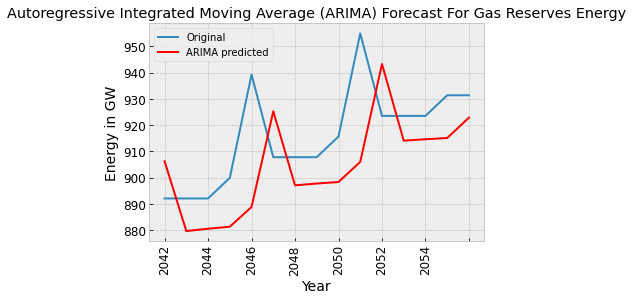

In [248]:
yhat = arima("Gas_reservesrRollingMean")
plot_arima("Gas_reservesrRollingMean", yhat, "Gas Reserves")

In [ ]:
plt.plot(df_test.RollingMean.values, label='Original')
plt.plot(yhat.values, color='red', label='ARIMA predicted')
plt.legend()

In [234]:
def plot_arima(column_name, yhat, title):
  predicted_dates = list(range(2040, 2056,2))
  fig, ax = plt.subplots()
  plt.plot(df_test[column_name].values, label='Original')
  plt.plot(yhat.values, color='red', label='ARIMA predicted')
  plt.title(f'Autoregressive Integrated Moving Average (ARIMA) Forecast For {title} Energy')
  plt.ylabel("Energy in GW")
  plt.xlabel("Year")
  ax.set_xticklabels(predicted_dates, rotation=90)
  plt.legend();
  plt.savefig(f"/content/drive/MyDrive/Timeseries/images/{title}_arima")

#### Auto ARIMA

In [ ]:
# building the model

autoModel = pm.auto_arima(df_training.RollingMean, trace=True,
                          error_action='ignore', suppress_warnings=True, seasonal=False)
autoModel.fit(df_training.RollingMean)

In [250]:
# building the model
def build_model(column_name):
  autoModel = pm.auto_arima(df_training[column_name], trace=True,
                          error_action='ignore', suppress_warnings=True, seasonal=False)
  autoModel.fit(df_training[column_name])

In [ ]:
order = autoModel.order
print(order)
yhat = list()
for t in tqdm(range(len(df_test.RollingMean))):
    temp_train = df_date[:len(df_training)+t]
    model = ARIMA(temp_train.RollingMean, order=order)
    model_fit = model.fit(disp=False)
    predictions = model_fit.predict(
        start=len(temp_train), end=len(temp_train), dynamic=False)
    yhat = yhat + [predictions]

yhat = pd.concat(yhat)
resultsDict['AutoARIMA {0}'.format(order)] = evaluate(
    df_test.RollingMean, yhat)
predictionsDict['AutoARIMA {0}'.format(order)] = yhat.values

In [ ]:
def auto_arima(column_name):
  